##รายชื่อสมาชิก Sandbox
1. นายพงศ์ธณัช สุนทรพรเลิศ 60130500055
2. นางสาวพลอยวริณทร์ อักษรน้ำผึ้ง 60130500059
3. นายธนกร เจริญเศรษฐกุล 60130500122

#โหลดข้อมูล

##import สิ่งที่ต้องใช้

In [ ]:
#Data
import pandas as pd
import numpy as np

#Prepocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

#visualization
from matplotlib import pyplot as plt
import seaborn as sns

##โหลดข้อมูลจาก github

In [ ]:
#โหลดข้อมูลจาก github ใส่ตัวแปร data
data = pd.read_csv("https://raw.githubusercontent.com/pleumza2009/MushroomClassificationData/main/mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


#Visualizations


* นำข้อมูลมาทำแผนภาพเพื่อแสดงสัดส่วนของข้อมูล

In [ ]:
#import library ที่ต้องใช้
import matplotlib.pylab as pylab

In [ ]:
#ตั้งค่าการตกแต่ง plot
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [ ]:
#สร้าง Histogram โดยนำข้อมูลเข้ามาใส่
def plot_col(col, hue=None, color=['#FF0000', 'limegreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, 
                  dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}",
           ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


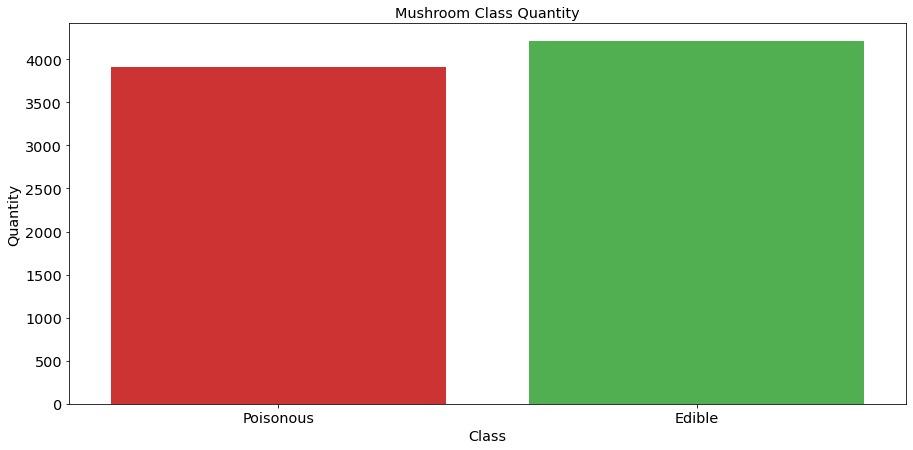

In [ ]:
#โชว์แผนภาพโดยใส่ label เข้าไปเพื่อแสดงจำนวนเห็ดที่มีพิษและไม่มีพิษ
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


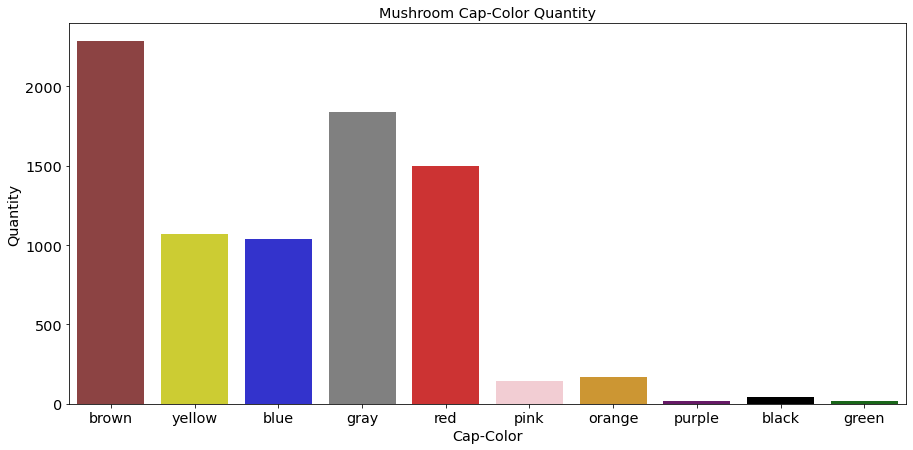

In [ ]:
#โชว์แผนภาพโดยใส่ label ชื่อสีเข้าไปเพื่อแสดงจำนวนเห็ดสีต่างๆ
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e",
              "pink":"p", "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

In [ ]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


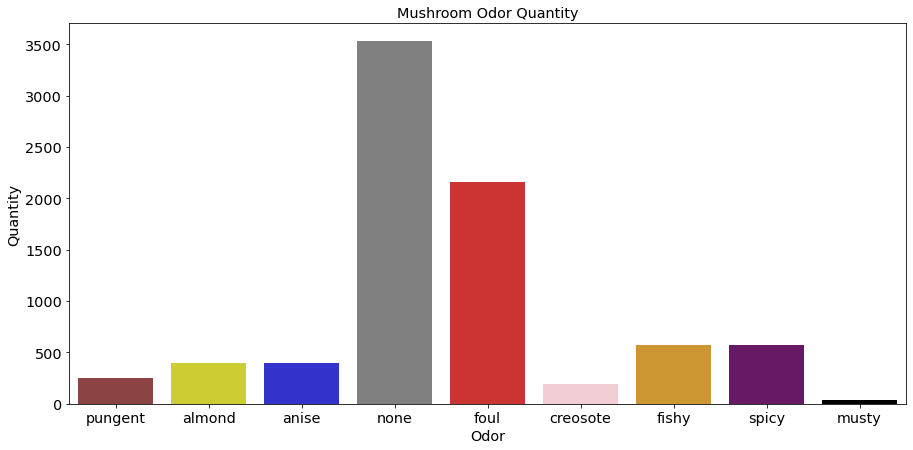

In [ ]:
#โชว์แผนภาพโดยใส่ label เข้าไปเพื่อแสดงจำนวนเห็ดกลิ่นต่างๆ
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
labels = get_labels(order, odor_dict)      
plot_col(col='odor', color=color_dict.keys(), labels=labels)

#เตรียมข้อมูล

##เช็คข้อมูล

In [ ]:
#check null data
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#Check number of row and column
data.shape

(8124, 23)

##เก็บข้อมูลลงตัวแปร

###แปลงข้อมูลจากตัวอักษรเป็นตัวเลข
* นำ LabelEncoder มาแปลงข้อมูลจากตัวอักษรเป็นตัวเลข เพื่อที่จะนำข้อมูลไปสร้าง Model ได้

In [ ]:
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


###เลือก features และเก็บลงตัวแปร

In [ ]:
#เลือก rows ทั้งหมดของข้อมูล แต่ไม่เอา Label มาใส่ในตัวแปร X
#โดยเอามาเพียง 5 features คือ สีของหมวกเห็ด ความช้ำ กลิ่น ขนาดของครีบ และที่อยู่อาศัย
X = data.loc[:,['cap-color','bruises','odor','gill-size','habitat']]  
#เลือก rows ทั้งหมด จาก Label มาใส่ในตัวแปร Y
y = data.iloc[:, 0]  

In [ ]:
#แสดงข้อมูลบางส่วนของ X เป็นตาราง
X.head()

,cap-color,bruises,odor,gill-size,habitat
0,4,1,6,1,5
1,9,1,0,0,1
2,8,1,3,0,3
3,8,1,6,1,5
4,3,0,5,0,1


In [ ]:
#แสดงข้อมูลบางส่วนของ Y เป็นตาราง
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

##Plot ข้อมูลแต่ละ features

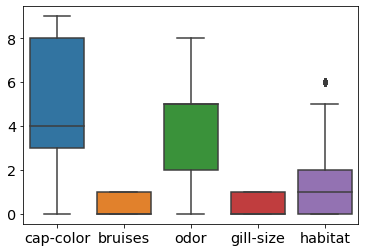

In [ ]:
#ทำ boxplot ของ features ทั้ง 5
sns.boxplot(data=X)

##แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ

In [ ]:
#import library
from sklearn.model_selection import train_test_split
#แบ่งชุดข้อมูลโดยเก็บในตัวแปร X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=4)

In [ ]:
#Check number of row and column ของ X_train
X_train.shape

(6499, 5)

In [ ]:
#Check number of row and column ของ X_test
X_test.shape

(1625, 5)

#Model
* สร้าง Model เพื่อนำไปใช้ โดยใช้ Pipeline ในการทำ
* นำ Model ที่ได้มาทำ Ensemble
* นำ Logistic Regression Model มาปรับ Parameter 

##Import Model
* import library ที่ต้องใช้

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

##Pipeline

In [ ]:
#import library
from sklearn.pipeline import Pipeline

###Logistic Regression Pipeline

In [ ]:
#สร้าง Logistic Regression Model โดยใช้ชื่อ model_lr
model_lr = Pipeline(steps =[('scale',StandardScaler()), 
                            ('lr',LogisticRegression())])
#ฝึก model_lr ด้วยข้อมูล train
model_lr.fit(X_train,y_train)
#ลองนำ model_lr มาทำนาย และเก็บค่า y ที่ทำนายได้
y_pred_lr=model_lr.predict(X_test)
#ทำ Report ด้วย y ที่ทำนายได้มาเปรียบเทียบกับ y จริงๆ
print('Linear Regression Report')
print(classification_report(y_pred_lr,y_test))


Linear Regression Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       860
           1       0.90      0.92      0.91       765

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



In [ ]:
#แสดงจำนวน confusion matrix โดยเก็บในตัวแปร cm_lr
cm_lr = confusion_matrix(y_true=y_test, y_pred=y_pred_lr,labels=[1, 0])
print(cm_lr)

[[705  75]
 [ 60 785]]


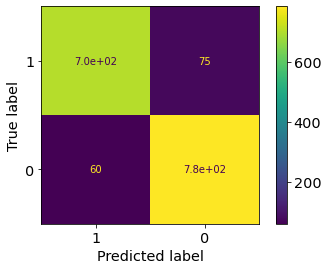

In [ ]:
#import library
from sklearn.metrics import plot_confusion_matrix
#แสดงแผนภาพของ confusion_matrix ของ model_lr 
plot_confusion_matrix(estimator=model_lr,X=X_test,y_true=y_test,labels=[1, 0]) 

###Decision Tree Pipeline

In [ ]:
#สร้าง DecisionTree Classifier Model โดยใช้ชื่อ model_dt
model_dt = DecisionTreeClassifier()
#ฝึก model_dt ด้วยข้อมูล train
model_dt.fit(X_train,y_train)
#ลองนำ model_dt มาทำนาย และเก็บค่า y ที่ทำนายได้
y_pred_dt=model_dt.predict(X_test)
#ทำ Report ด้วย y ที่ทำนายได้มาเปรียบเทียบกับ y จริงๆ
print('Decision Tree Report')
print(classification_report(y_pred_dt,y_test))

Decision Tree Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#แสดงจำนวน confusion matrix โดยเก็บในตัวแปร cm_dt
cm_dt = confusion_matrix(y_true=y_test, y_pred=y_pred_dt,labels=[1, 0])
print(cm_dt)

[[780   0]
 [  0 845]]


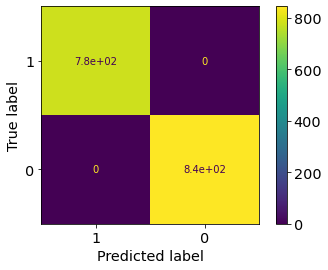

In [ ]:
#แสดงแผนภาพของ confusion_matrix ของ model_dt 
plot_confusion_matrix(estimator=model_dt,X=X_test,y_true=y_test,labels=[1, 0])

###Support Vector Machine Pipeline

In [ ]:
#สร้าง Support Vector Machine Model โดยใช้ชื่อ model_svc
model_svc = Pipeline(steps =[('scale',StandardScaler()), ('svm',SVC())])
#ฝึก model_svc ด้วยข้อมูล train
model_svc.fit(X_train,y_train)
#ลองนำ model_svc มาทำนาย และเก็บค่า y ที่ทำนายได้
y_pred_svc=model_svc.predict(X_test)
#ทำ Report ด้วย y ที่ทำนายได้มาเปรียบเทียบกับ y จริงๆ
print('Support Vector Machine Report')
print(classification_report(y_pred_svc,y_test))

Support Vector Machine Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       867
           1       0.97      1.00      0.99       758

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
#แสดงจำนวน confusion matrix โดยเก็บในตัวแปร cm_svc
cm_svc = confusion_matrix(y_true=y_test, y_pred=y_pred_svc,labels=[1, 0])
print(cm_svc)

[[758  22]
 [  0 845]]


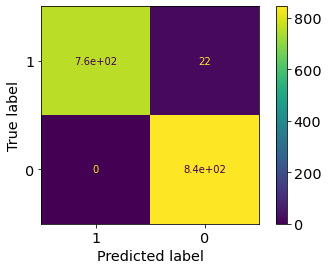

In [ ]:
#แสดงแผนภาพของ confusion_matrix ของ model_svc 
plot_confusion_matrix(estimator=model_svc,X=X_test,y_true=y_test,labels=[1, 0])

###Neural Network Pipeline

In [ ]:
#สร้าง Neural Network Model โดยใช้ชื่อ model_mlp
model_mlp = Pipeline(steps =[('scale',StandardScaler()), 
                             ('MLP',MLPClassifier())])
#ฝึก model_mlp ด้วยข้อมูล train
model_mlp.fit(X_train,y_train)
#ลองนำ model_mlp มาทำนาย และเก็บค่า y ที่ทำนายได้
y_pred_mlp=model_mlp.predict(X_test)
#ทำ Report ด้วย y ที่ทำนายได้มาเปรียบเทียบกับ y จริงๆ
print(' Neural network Report')
print(classification_report(y_pred_mlp,y_test))

 Neural network Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#แสดงจำนวน confusion matrix โดยเก็บในตัวแปร cm_mlp
cm_mlp = confusion_matrix(y_true=y_test, y_pred=y_pred_mlp,labels=[1, 0])
print(cm_mlp)

[[780   0]
 [  0 845]]


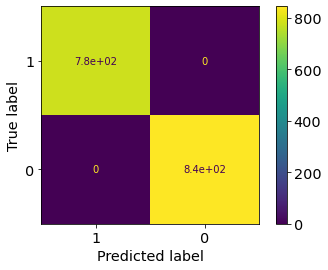

In [ ]:
#แสดงแผนภาพของ confusion_matrix ของ model_mlp 
plot_confusion_matrix(estimator=model_mlp,X=X_test,y_true=y_test,labels=[1, 0])

###Ensemble (Voting Classifier)

In [ ]:
#import library
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
#สร้าง Ensemble Model จาก model_lr, model_svc, model_dt และ model_mlp
#โดยใช้ชื่อ ensemble_model
ensemble_model = VotingClassifier(estimators=[('lr',model_lr),
 ('svm',model_svc),
 ('dt',model_dt),
 ('rf',model_mlp)],voting='hard')

In [ ]:
#คำนวน score accuracy ของ ensemble_model โดยเก็บในตัวแปร score
score = cross_val_score(estimator=ensemble_model,X=X_train,y=y_train,cv=10,
                        scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(score.mean())

0.9913827189759393


###Hyper Parameter (Grid Search)
* จากค่า accuracy ของ Logistic Regression Model นั้นมีค่าน้อยที่สุด จึงนำมาปรับ Parameter
---



In [ ]:
#import library
from sklearn.model_selection import GridSearchCV

#สร้าง Array param_range ที่เก็บตัวเลขในการปรับ C
param_range=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]

#สร้าง Array param_solver1 ที่เก็บค่าในการปรับ solver
param_solver1=['newton-cg', 'lbfgs', 'sag', 'saga']

#สร้าง Array param_solver2 ที่เก็บค่าในการปรับ solver
param_solver2=['liblinear', 'saga']

#สร้าง Array param_grid ที่เก็บ parameter ที่จะนำไปปรับ param_grid
param_grid = [{'lr__C':param_range,
               'lr__penalty':['l2'],
               'lr__solver':param_solver1},
              {'lr__C':param_range,
               'lr__penalty':['l1'],
               'lr__solver':param_solver2}]

#นำ GridSearchCV มาปรับ model_lr โดยได้เป็น model ใหม่ชื่อ gs_lr
gs_lr=GridSearchCV(estimator=model_lr,
                param_grid=param_grid,
                scoring='accuracy') #default cv = 5

In [ ]:
#ฝึก gs_lr ด้วยข้อมูล train
gs_lr=gs_lr.fit(X_train,y_train)

In [ ]:
#ดู best score ของ gs_lr
gs_lr.best_score_

0.9124487475572925

In [ ]:
#ดู parameter ที่ gs_lr ปรับมาแล้ว
gs_lr.best_params_

{'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solver': 'saga'}

In [ ]:
#นำ model ที่ดีที่สุดจากการปรับ Parameter มาเก็บเป็น model ใหม่ชื่อ best_model_gs_lr
#โดยสามารถนำ best_model_gs_lr ไปใช้ทำนายได้เลย
best_model_gs_lr = gs_lr.best_estimator_

In [ ]:
#ดู score จากการทำนายของ model
best_model.score(X_test,y_test)

0.916923076923077

* จาก Model Pipeline ของ Logistic Regression Model นั้นมี default parameter ดังนี้ C: 1.0, penalty: l2, solver: lbfgs
* จากคะแนนของ gs_lr ทำให้พบว่า Model แบบ Pipeline ในตอนแรกนั้นดีกว่า จึงไม่ควรต้องปรับอะไร

##Save Model
* save model เก็บเป็น file ไว้เพื่อจะสามารถนำไป Apply กับ Application ต่างๆได้

In [ ]:
#import library
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#เก็บ model Logistic Regression ชื่อ model_lr
joblib.dump(model_lr,'model_lr.model')

#เก็บ model Decision Tree ชื่อ model_dt
joblib.dump(model_dt,'model_dt.model')

#เก็บ model Neural Network ชื่อ model_mlp
joblib.dump(model_mlp,'model_mlp.model')

#เก็บ model Support Vector Machine ชื่อ model_svc
joblib.dump(model_svc,'model_svc.model')

['model_svc.model']

##Load Model
* สามารถดาวน์โหลด Model ที่เก็บไว้มาใช้ได้แบบนี้ค่ะ

In [ ]:
#โหลด model_lr มาใส่ตัวแปร model_lr_load
model_lr_load=joblib.load('model_lr.model')

#นำ model_lr_load มาทำนาย
y_predict_lr_form_load=model_lr_load.predict(X)

#ดูผลการทำนาย
y_predict_lr_form_load

array([1, 0, 0, ..., 0, 1, 0])